<a href="https://colab.research.google.com/github/aapolaivm/Google-Colab-algorithms/blob/main/HomeAssingmentPSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

(-500.0, 500.0)

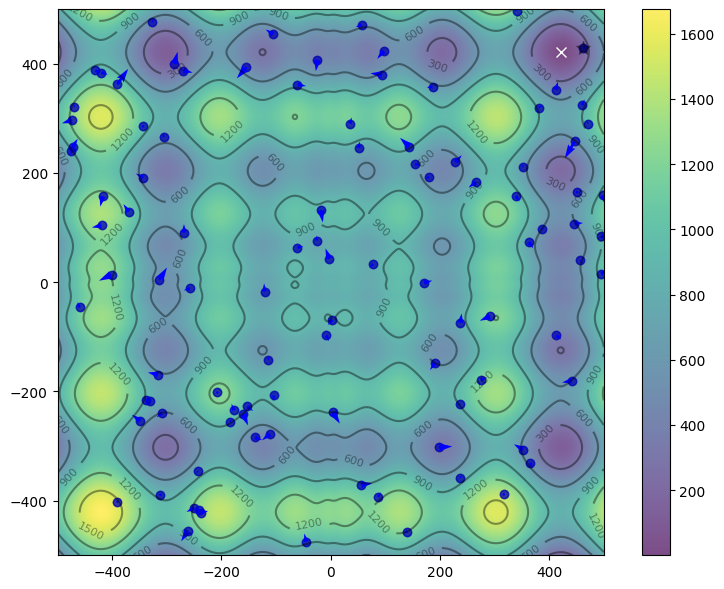

In [ ]:
# Schwefel function
def schwefel(x, y):
    return 418.9829*2 - (x * np.sin(np.sqrt(np.abs(x))) + y * np.sin(np.sqrt(np.abs(y))))

# Parameters for algorithm
c1 = 0.05   # local
c2 = 0.08   # global
w = 0.9    # weight

# Creating agents
n_particles = 100
P = np.random.rand(2, n_particles) * 1000 - 500
V = np.random.randn(2, n_particles) * 10

# Definign linearspace
x, y = np.array(np.meshgrid(np.linspace(-500,500, 1000), np.linspace(-500,500, 1000)))
z = schwefel(x,y)

# Global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
P
# Initialize data
pbest = P
pbest_obj = schwefel(P[0], P[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

def updateSchwefel():
    global V, P, pbest, pbest_obj, gbest, gbest_obj, n_particles

    # Updating parameters
    r1, r2 = np.random.rand(2,n_particles)
    V = w * V + c1*r1*(pbest - P) + c2*r2*(gbest.reshape(-1,1)-P)
    P = P + V

    # Enforce boundaries
    P[0] = np.clip(P[0], -500, 500)
    P[1] = np.clip(P[1], -500, 500)

    obj = schwefel(P[0], P[1])
    pbest[:, (pbest_obj >= obj)] = P[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

# Plotting fiures
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[-500, 500, -500, 500], origin='lower', cmap='viridis', alpha=0.7)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=7, color="white")
contours = ax.contour(x, y, z, 5, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(P[0], P[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(P[0], P[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([-500,500])
ax.set_ylim([-500,500])

In [ ]:
def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    updateSchwefel()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(P.T)
    p_arrow.set_offsets(P.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot

anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
anim.save("PSO_schwefel.gif", dpi=120, writer="pillow")

print("PSO found best solution at schwefel({})={}".format(gbest, gbest_obj))
print("Global optimal at schwefel({})={}".format([x_min,y_min], schwefel(x_min,y_min)))

PSO found best solution at schwefel([420.93825494 420.96717967])=0.00014307963317605754
Global optimal at schwefel([420.92092092092105, 420.92092092092105])=0.0006026767155162815


(0.0, 4.0)

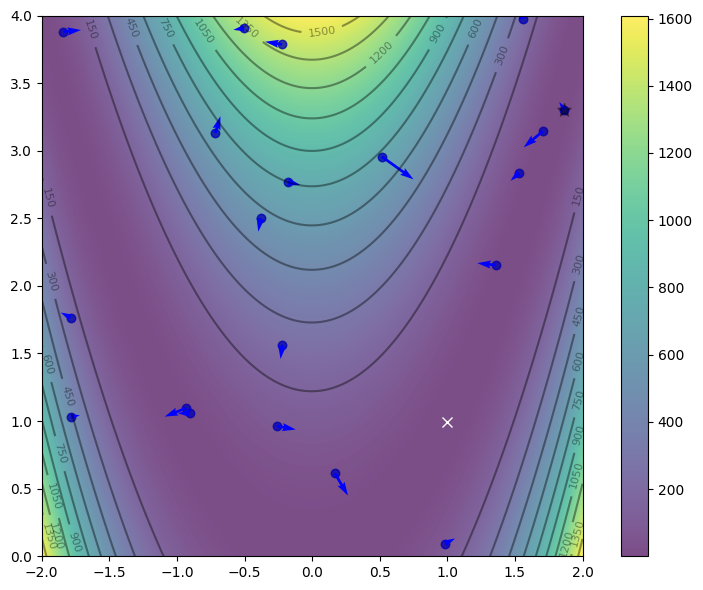

In [ ]:
# Function Definition Banana

def banana(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Hyper-parameter of the algorithm
c1 = 0.1  # local
c2 = 0.1  # global
w = 0.9
n_particles = 20

# Definign linearspace
x_linspace = np.linspace(-2, 2, 300)
y_linspace = np.linspace(0, 4, 300)
x, y = np.array(np.meshgrid(x_linspace, y_linspace))
z = banana(x,y)

# Global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# Creating agents
#np.random.seed(100)
P = np.random.rand(2, n_particles) * 1
P_x = np.random.choice(x_linspace, n_particles)
P_y = np.random.choice(y_linspace, n_particles)
P = np.vstack((P_x, P_y))
V = np.random.randn(2, n_particles) * 0.1

# Initialize data
pbest = P
pbest_obj = banana(P[0], P[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

def updateBanana():
    global V, P, pbest, pbest_obj, gbest, gbest_obj, n_particles

    # Updating parameters
    r1, r2 = np.random.rand(2,n_particles)
    V = w*V + c1*r1*(pbest - P) + c2*r2*(gbest.reshape(-1,1)-P)
    P = P + V
    obj = banana(P[0], P[1])
    pbest[:, (pbest_obj >= obj)] = P[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

# Plotting fiures
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[-2, 2, 0, 4], origin='lower', cmap='viridis', alpha=0.7)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=7, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(P[0], P[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(P[0], P[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([-2, 2])
ax.set_ylim([0, 4])

In [ ]:
def animate(i):
    title = 'Iteration {:02d}'.format(i)
    # Update params
    updateBanana()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(P.T)
    p_arrow.set_offsets(P.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot

anim = FuncAnimation(fig, animate, frames=list(range(1,100)), interval=250, blit=False, repeat=True)
anim.save("PSO_banana.gif", dpi=120, writer="pillow")

print("PSO found best solution at banana({})={}".format(gbest, gbest_obj))
print("Global optimal at banana({})={}".format([x_min,y_min], banana(x_min,y_min)))

PSO found best solution at banana([1.26113303 1.59055831])=0.06819149696702217
Global optimal at banana([0.9966555183946486, 0.9899665551839465])=0.0011372357677964162
